In [10]:
import pandas as pd
df=pd.read_csv('./bhp.csv')
df.head()


,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


max percentile

In [11]:
max_thresold = df.price_per_sqft.quantile(0.999)
max_thresold

50959.36200000098

min percentile

In [12]:
min_thresold  =df.price_per_sqft.quantile(0.0001)

In [13]:
min_thresold

385.3955

removing outlier with percentile

In [14]:
outlier = df[(df.price_per_sqft<max_thresold)&(df.price_per_sqft > min_thresold)]

In [15]:
df.shape

(13200, 7)

In [16]:
outlier.shape

(13184, 7)

In [19]:
import matplotlib
from matplotlib import  pyplot as plt
%matplotlib inline
matplotlib.rcParams['figure.figsize']=(10,6)


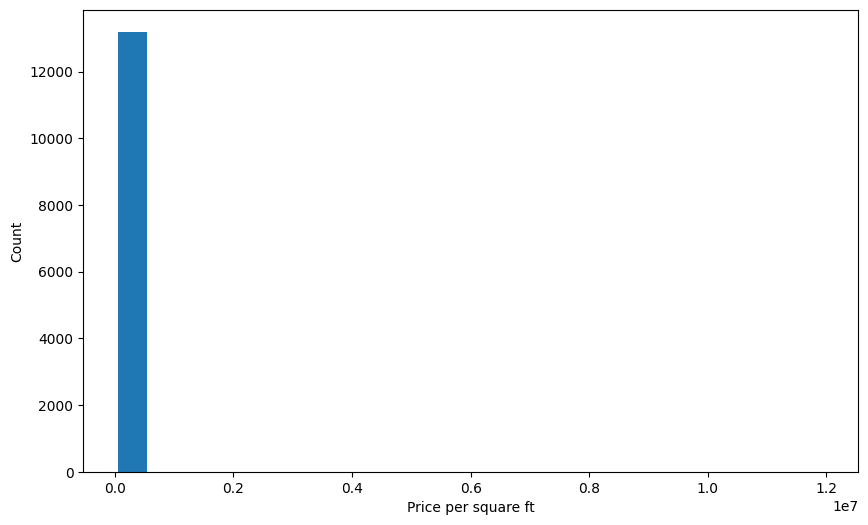

In [21]:
plt.hist(df.price_per_sqft, bins=20, rwidth=0.8)
plt.xlabel('Price per square ft')
plt.ylabel('Count')
plt.show()

Using log scale can make visualization little better

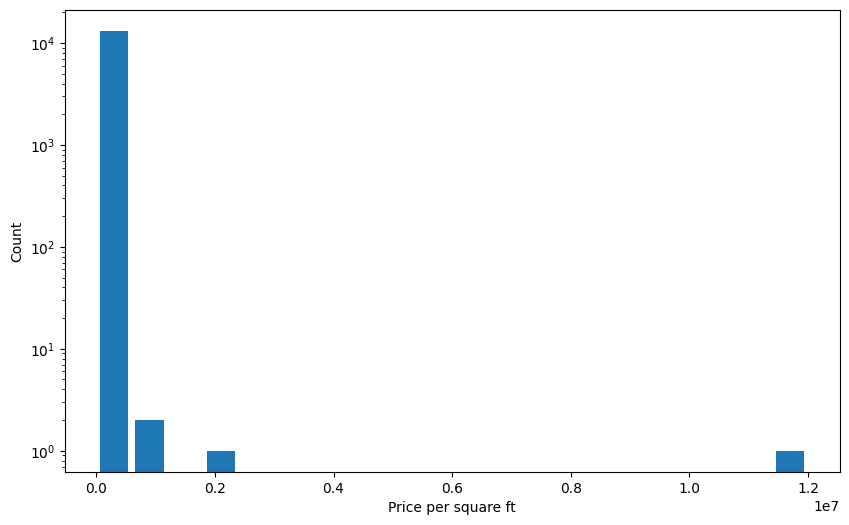

In [22]:
plt.hist(df.price_per_sqft, bins=20, rwidth=0.8)
plt.xlabel('Price per square ft')
plt.ylabel('Count')
plt.yscale('log')
plt.show()

In [23]:
lower_limit, upper_limit = df.price_per_sqft.quantile([0.001, 0.999])
lower_limit, upper_limit

(1366.184, 50959.36200000098)

In [24]:
outliers = df[(df.price_per_sqft>upper_limit) | (df.price_per_sqft<lower_limit)]
outliers.sample(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
7166,Yelahanka,1 Bedroom,26136.0,1.0,150.0,1,573
5417,Ulsoor,4 BHK,36000.0,4.0,450.0,4,1250
8307,Bannerghatta Road,5 BHK,2500.0,4.0,1400.0,5,56000
1005,other,1 BHK,15.0,1.0,30.0,1,200000
3934,other,1 BHK,1500.0,1.0,19.5,1,1300
7862,JP Nagar,3 BHK,20000.0,3.0,175.0,3,875
11447,Whitefield,4 Bedroom,60.0,4.0,218.0,4,363333
7012,other,1 BHK,650.0,1.0,500.0,1,76923
6356,Bommenahalli,4 Bedroom,2940.0,3.0,2250.0,4,76530
665,Yelahanka,3 BHK,35000.0,3.0,130.0,3,371


In [25]:
df2 = df[(df.price_per_sqft<upper_limit) & (df.price_per_sqft>lower_limit)]
df2.shape

(13172, 7)

In [26]:
df.shape[0] - df2.shape[0]

28

In [27]:
max_limit = df2.price_per_sqft.mean() + 4*df2.price_per_sqft.std()
min_limit = df2.price_per_sqft.mean() - 4*df2.price_per_sqft.std()
max_limit, min_limit

(23227.73653589432, -9900.429065502582)

In [28]:
df2[(df2.price_per_sqft>max_limit) | (df2.price_per_sqft<min_limit)].sample(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
11838,Vijayanagar,4 Bedroom,1500.0,4.0,360.0,4,24000
9711,Rajaji Nagar,2 Bedroom,1056.0,1.0,250.0,2,23674
4400,other,8 Bedroom,750.0,8.0,200.0,8,26666
9360,HAL 2nd Stage,4 Bedroom,2280.0,4.0,615.0,4,26973
733,Cunningham Road,4 BHK,5270.0,4.0,1250.0,4,23719
2618,Malleshwaram,7 Bedroom,3000.0,4.0,900.0,7,30000
11919,other,3 Bedroom,1524.0,4.0,400.0,3,26246
11696,other,4 Bedroom,2360.0,4.0,601.0,4,25466
3665,Koramangala,4 Bedroom,2400.0,6.0,600.0,4,25000
6744,HAL 2nd Stage,2 Bedroom,600.0,3.0,145.0,2,24166


In [29]:
df3 = df2[(df2.price_per_sqft>min_limit) & (df2.price_per_sqft<max_limit)]
df3.shape

(13047, 7)

In [30]:
df2.shape[0]-df3.shape[0]

125

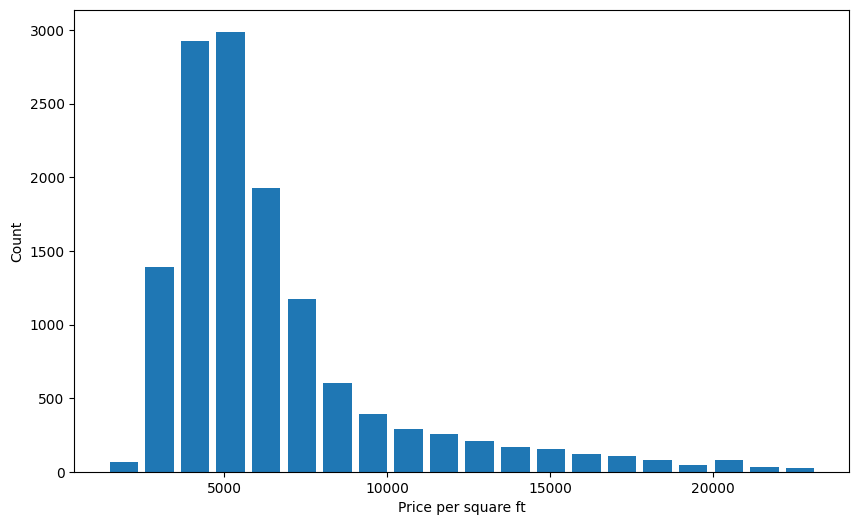

In [31]:
plt.hist(df3.price_per_sqft, bins=20, rwidth=0.8)
plt.xlabel('Price per square ft')
plt.ylabel('Count')
plt.show()

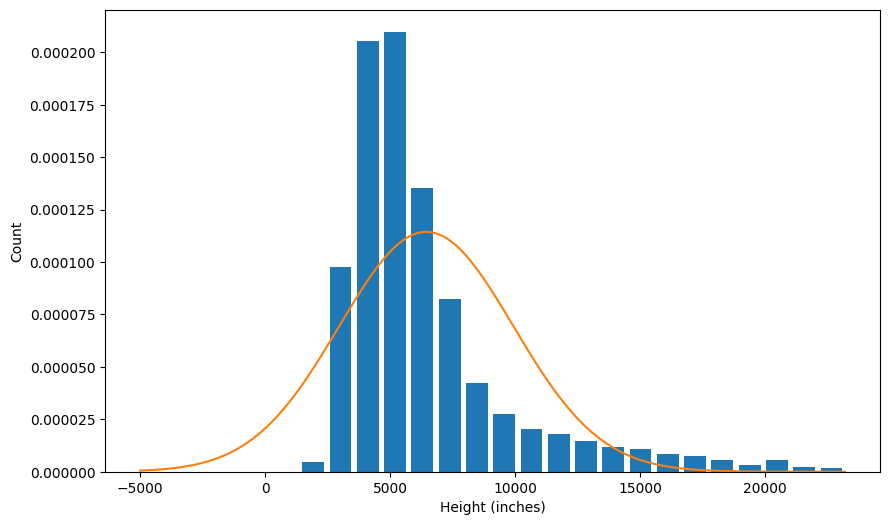

In [32]:
from scipy.stats import norm
import numpy as np

plt.hist(df3.price_per_sqft, bins=20, rwidth=0.8, density=True)
plt.xlabel('Height (inches)')
plt.ylabel('Count')

rng = np.arange(-5000, df3.price_per_sqft.max(), 100)
plt.plot(rng, norm.pdf(rng,df3.price_per_sqft.mean(),df3.price_per_sqft.std()))

In [33]:
df2['zscore'] = (df2.price_per_sqft-df2.price_per_sqft.mean())/df2.price_per_sqft.std()
df2.sample(10)

C:\Users\codea\AppData\Local\Temp\ipykernel_12508\722868599.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['zscore'] = (df2.price_per_sqft-df2.price_per_sqft.mean())/df2.price_per_sqft.std()


,location,size,total_sqft,bath,price,bhk,price_per_sqft,zscore
5619,R.T. Nagar,2 BHK,970.0,2.0,55.00,2,5670,-0.239954
4193,Electronic City Phase II,3 BHK,993.0,2.0,50.00,3,5035,-0.393298
9218,Thigalarapalya,4 BHK,3122.0,6.0,245.00,4,7847,0.285762
5051,Rayasandra,3 BHK,1577.0,3.0,67.00,3,4248,-0.583347
7268,Uttarahalli,3 BHK,1215.0,2.0,52.85,3,4349,-0.558957
11127,Kengeri Satellite Town,2 BHK,1025.0,2.0,28.57,2,2787,-0.936159
6127,Yelenahalli,3 BHK,1500.0,2.0,57.00,3,3800,-0.691533
13048,Benson Town,2 Bedroom,1688.0,2.0,280.00,2,16587,2.396353
7889,Kasavanhalli,2 BHK,1375.0,2.0,78.00,2,5672,-0.239471
7254,other,8 Bedroom,1000.0,7.0,160.00,8,16000,2.254600


In [34]:
outliers_z = df2[(df2.zscore < -4) | (df2.zscore>4)]
outliers_z.shape

(125, 8)

In [35]:
outliers_z = df2[(df2.zscore < -4) | (df2.zscore>4)]
outliers_z.shape

(125, 8)

In [36]:
df4 = df2[(df2.zscore>-4)&(df2.zscore<4)]
df4.shape

(13047, 8)

In [37]:
df2.shape[0] - df4.shape[0]

125